In [1]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')


In [4]:
df = pd.read_csv('../data/at-dataset/final_data.csv')
df = df.set_index('DateTime')
df.index = pd.to_datetime(df.index)

In [ ]:
df[df['Detector_ID'] == 2052]['Lane'].value_counts().sort_index()

Lane
1     22632
2     22632
3     22632
4     22632
5     22632
6     22632
7     22632
8     22632
9     22632
10    22632
11    22632
12    22632
13    22632
14    22632
15    22632
16    22632
Name: count, dtype: int64

In [14]:
def showFigureEachLaneTraffic(df):
    lanes = sorted(df['Lane'].unique())
    num_lanes = len(lanes)
    print(num_lanes)

    fig, axes = plt.subplots(num_lanes, 1, figsize=(20, 5 * num_lanes), sharex=True)

    # If only one lane, axes won't be an array
    if num_lanes == 1:
        axes = [axes]

    for ax, lane in zip(axes, lanes):
        sub_df = df[df['Lane'] == lane]
        ax.plot(sub_df.index, sub_df['Volume'], '-', label=f'Lane {lane}')
        ax.set_title(f'Traffic Volume over Time - Lane {lane}')
        ax.set_ylabel('Traffic Volume')
        ax.legend()

    # Add extra space between subplots
    fig.subplots_adjust(hspace=0.1)  # increase spacing between rows
    plt.xlabel('DateTime')
    plt.show()

def showFigureEachLaneTrafficForOneWeek(df):
    df = df[(df.index > '2024-10-01') & (df.index <= '2024-10-07')]
    lanes = sorted(df['Lane'].unique())
    num_lanes = len(lanes)
    print(num_lanes)

    fig, axes = plt.subplots(num_lanes, 1, figsize=(20, 5 * num_lanes), sharex=True)

    # If only one lane, axes won't be an array
    if num_lanes == 1:
        axes = [axes]

    for ax, lane in zip(axes, lanes):
        sub_df = df[df['Lane'] == lane]
        ax.plot(sub_df.index, sub_df['Volume'], '-', label=f'Lane {lane}')
        ax.set_title(f'Traffic Volume over Time - Lane {lane}')
        ax.set_ylabel('Traffic Volume')
        ax.legend()

    # Add extra space between subplots
    fig.subplots_adjust(hspace=0.1)  # increase spacing between rows
    plt.xlabel('DateTime')
    plt.show()

16


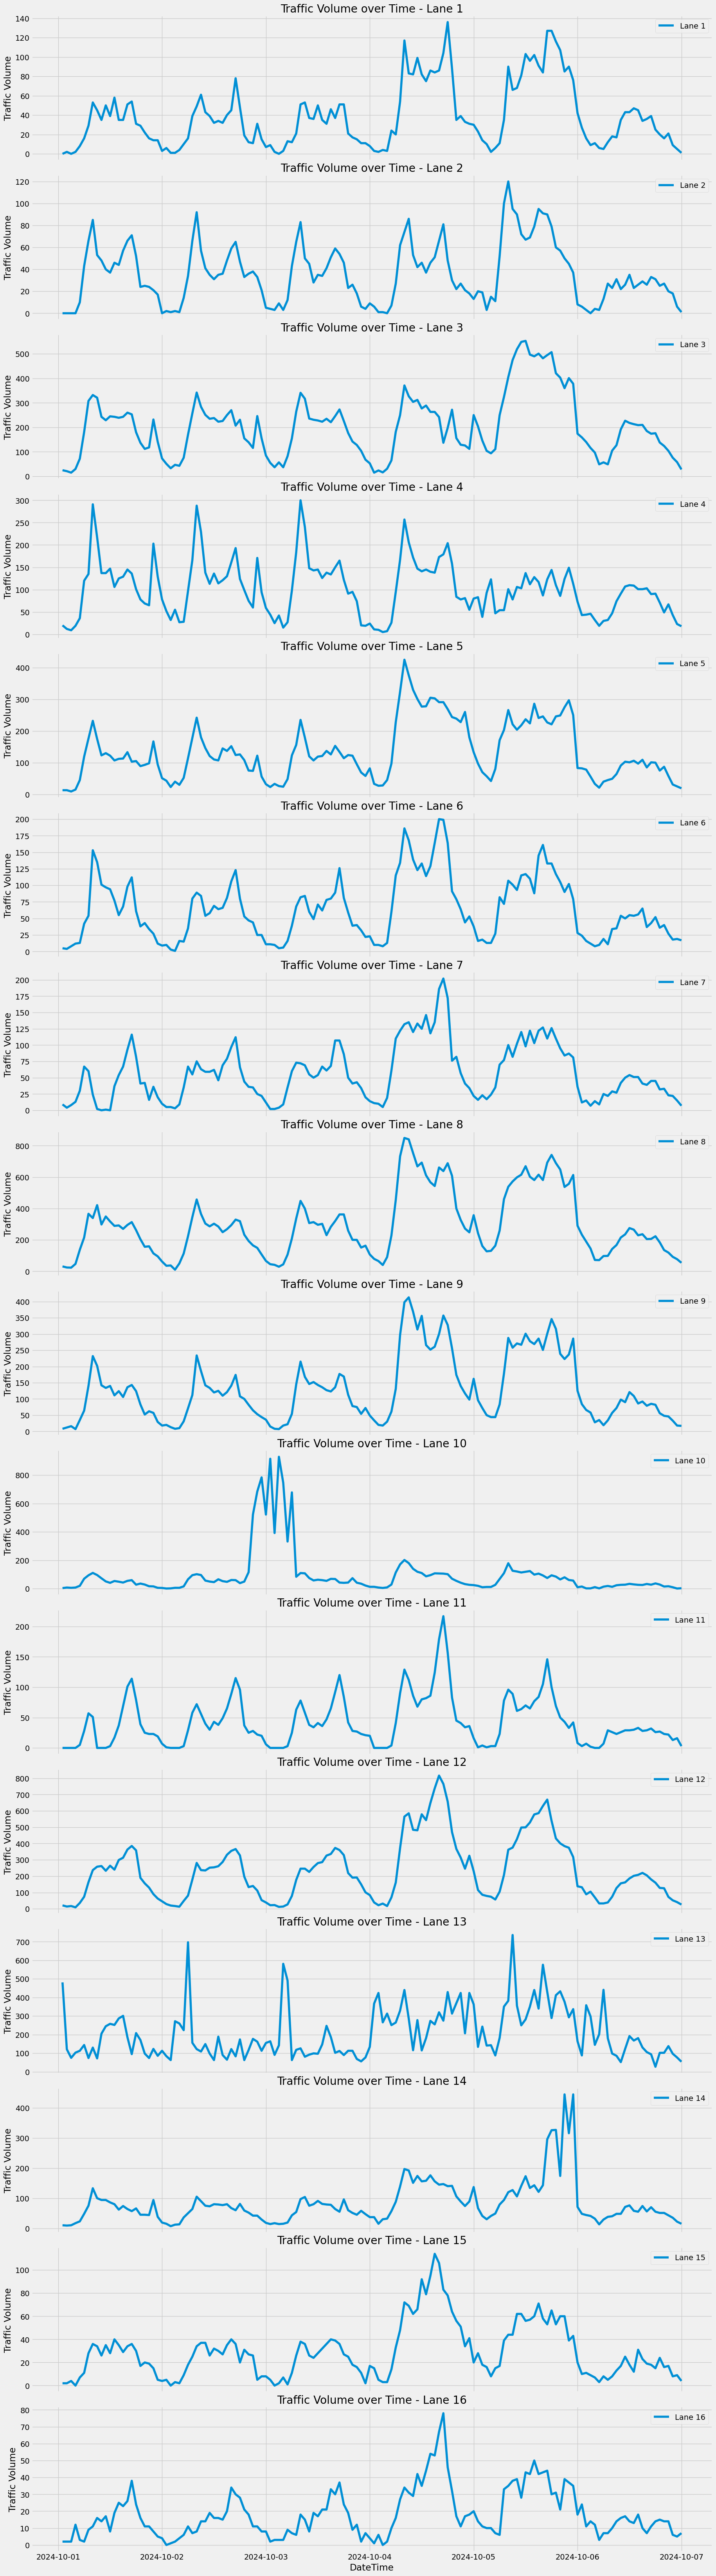

In [15]:
# sub_df = df[(df['Detector_ID'] == 2013) & (df['Lane'] == 1)]
sub_df = df[(df['Detector_ID'] == 2052)]
# & (df.index > '2024-10-01') & (df.index < '2024-12-01')
# sub_df['Volume'].plot(style='.', figsize=(20, 5), title='Traffic Volume over Time', xlabel='DateTime', ylabel='Traffic Volume')
showFigureEachLaneTrafficForOneWeek(sub_df)

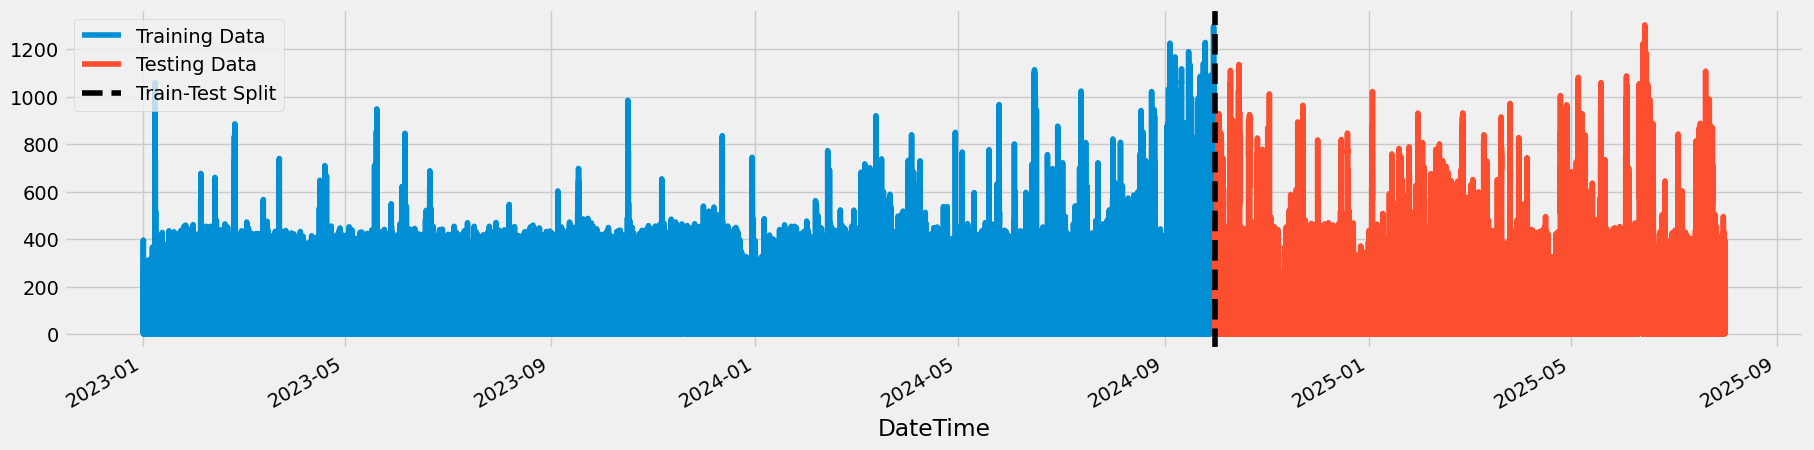

In [16]:
train = sub_df.loc[sub_df.index < '2024-10-01']
test = sub_df.loc[sub_df.index >= '2024-10-01']
fig, ax = plt.subplots(figsize=(20, 5))
train['Volume'].plot(ax=ax, label='Training Data')
test['Volume'].plot(ax=ax, label='Testing Data')
plt.axvline('2024-10-01', color='black', linestyle='--', label='Train-Test Split')
plt.legend()
plt.show()

In [17]:
## Feature Creation
def create_time_features(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    df['month'] = df.index.month
    df['year'] = df.index.year
    return df

In [18]:
sub_df = create_time_features(sub_df)

In [19]:
train = create_time_features(train)
test = create_time_features(test)
FEATURES = ['Detector_ID', 'Lane', 'hour', 'day', 'dayofweek', 'month','year']
TARGET = 'Volume'

In [20]:
X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [21]:
reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50, learning_rate = 0.1)
reg.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_test, y_test)], 
        verbose=True)

[0]	validation_0-rmse:88.95996	validation_1-rmse:96.67058
[1]	validation_0-rmse:85.60032	validation_1-rmse:93.65197
[2]	validation_0-rmse:82.67759	validation_1-rmse:90.87741
[3]	validation_0-rmse:79.94235	validation_1-rmse:88.51872
[4]	validation_0-rmse:76.99425	validation_1-rmse:85.93702
[5]	validation_0-rmse:74.99264	validation_1-rmse:84.10490
[6]	validation_0-rmse:72.02895	validation_1-rmse:81.51189
[7]	validation_0-rmse:69.43281	validation_1-rmse:79.28659
[8]	validation_0-rmse:67.28607	validation_1-rmse:77.42428
[9]	validation_0-rmse:66.10284	validation_1-rmse:76.34538
[10]	validation_0-rmse:64.49368	validation_1-rmse:75.05470
[11]	validation_0-rmse:63.07647	validation_1-rmse:73.88643
[12]	validation_0-rmse:61.72732	validation_1-rmse:72.79512
[13]	validation_0-rmse:60.95214	validation_1-rmse:72.09763
[14]	validation_0-rmse:59.99895	validation_1-rmse:71.33570
[15]	validation_0-rmse:59.11229	validation_1-rmse:70.80191
[16]	validation_0-rmse:58.38586	validation_1-rmse:70.24667
[17]	va

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,50
,enable_categorical,False
,eval_metric,None


In [22]:
pd.DataFrame(data=reg.feature_importances_, index=reg.feature_names_in_)

,0
Detector_ID,0.000000
Lane,0.489262
hour,0.266522
day,0.025872
dayofweek,0.089164
month,0.057922
year,0.071257


In [23]:
test['prediction'] =reg.predict(X_test)

In [24]:
trydf = sub_df.merge(test[['Lane', 'prediction']], how='left', left_on=['Lane', sub_df.index], right_on=['Lane', test.index])
trydf.set_index('key_1', inplace=True)

In [48]:
def showTrafficVolumeWithPredictions(df):
    df = df[(df.index > '2025-07-01') & (df.index <= '2025-07-08') & (df['Lane'] == 3)] 
    lanes = sorted(df['Lane'].unique())
    num_lanes = len(lanes)

    fig, axes = plt.subplots(num_lanes, 1, figsize=(20, 5 * num_lanes), sharex=True)

    # If only one lane, axes won't be an array
    if num_lanes == 1:
        axes = [axes]

    for ax, lane in zip(axes, lanes):
        sub_df = df[df['Lane'] == lane]
        ax.plot(sub_df.index, sub_df['Volume'], '-', label=f'Lane {lane}')
        ax.plot(sub_df.index, sub_df['prediction'], '-', label=f'Predictions Lane {lane}')
        ax.set_title(f'Traffic Volume over Time - Lane {lane}')
        ax.set_ylabel('Traffic Volume')
        ax.legend()

    # Add extra space between subplots
    fig.subplots_adjust(hspace=0.1)  # increase spacing between rows
    plt.xlabel('DateTime')
    plt.show()

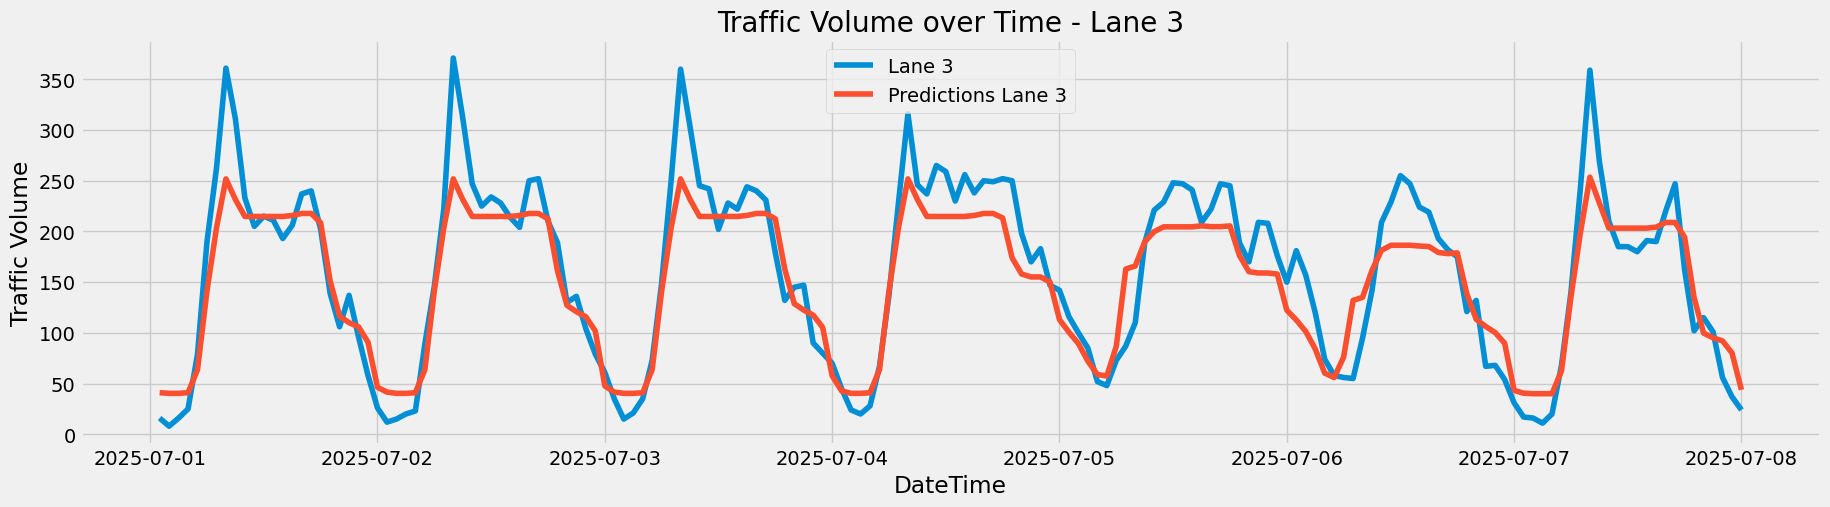

In [49]:
showTrafficVolumeWithPredictions(trydf)

In [27]:
average_traffic = pd.DataFrame()
average_traffic['average_volume'] = trydf.groupby(trydf.index).mean()['Volume']
average_traffic['average_prediction'] =trydf.groupby(trydf.index).mean()['prediction']

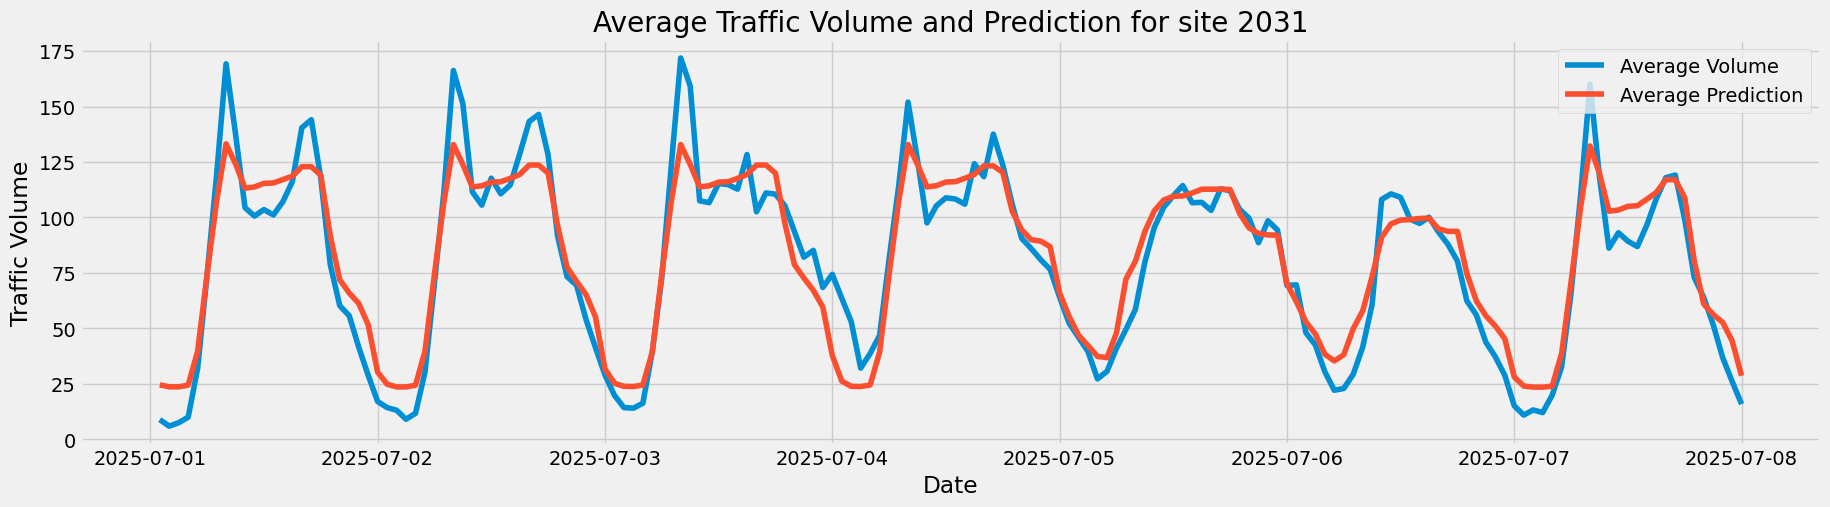

In [28]:
temp = average_traffic[(average_traffic.index > '2025-07-01') & (average_traffic.index <= '2025-07-08')] 
plt.figure(figsize=(20, 5))
plt.plot(temp.index, temp['average_volume'], label='Average Volume')
plt.plot(temp.index, temp['average_prediction'], label='Average Prediction')
plt.title('Average Traffic Volume and Prediction for site 2031')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.legend()

In [29]:
import shap
import tqdm as notebook_tqdm

C:\Users\hanju\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [30]:
background = X_train.sample(min(1000, len(X_train)), random_state=42)

explainer = shap.TreeExplainer(reg, feature_perturbation="tree_path_dependent")

In [31]:
# choose a set to explain
X_explain = X_test  # or X_test

# for speed on big sets, sample
X_explain_sample = X_explain.sample(min(5000, len(X_explain)), random_state=42)

# SHAP values: returns array (n_samples, n_features)
shap_values = explainer.shap_values(X_explain_sample)
# Expected value (model base value)
base_value = explainer.expected_value


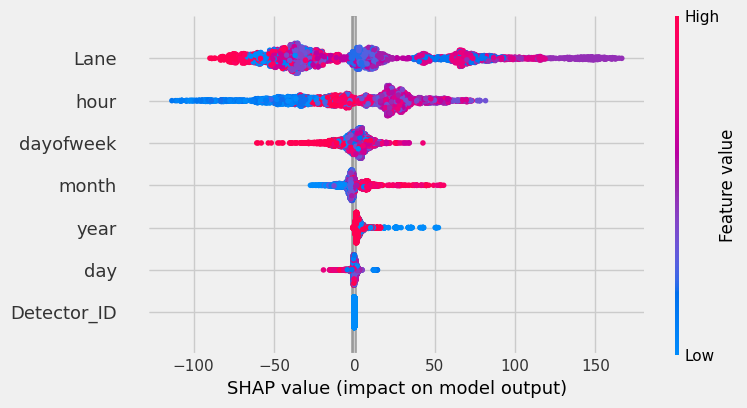

In [32]:
shap.summary_plot(shap_values, X_explain_sample, show=True)

In [33]:
X_explain[X_explain['Lane'] == 5].iloc[[8]]

,Detector_ID,Lane,hour,day,dayofweek,month,year
DateTime,,,,,,,
2024-10-01 08:00:00,2052,5,8,1,1,10,2024


In [34]:
test[test['Lane'] == 5].iloc[[0]]

,Detector_ID,Lane,Volume,hour,day,dayofweek,month,year,prediction
DateTime,,,,,,,,,
2024-10-01,2052,5,30,0,1,1,10,2024,40.659958


In [35]:
test[test['Lane'] == 6].iloc[[7272]]

,Detector_ID,Lane,Volume,hour,day,dayofweek,month,year,prediction
DateTime,,,,,,,,,
2025-07-31,2052,6,9,0,31,3,7,2025,12.788649


In [36]:
test[(test['Lane'] == 6) & (test.index == '2025-07-04 00:00:00')]

,Detector_ID,Lane,Volume,hour,day,dayofweek,month,year,prediction
DateTime,,,,,,,,,
2025-07-04,2052,6,5,0,4,4,7,2025,20.659849


In [37]:
test[(test['Lane'] == 6) & (test.index == '2025-07-04 08:00:00')]

,Detector_ID,Lane,Volume,hour,day,dayofweek,month,year,prediction
DateTime,,,,,,,,,
2025-07-04 08:00:00,2052,6,68,8,4,4,7,2025,80.808136


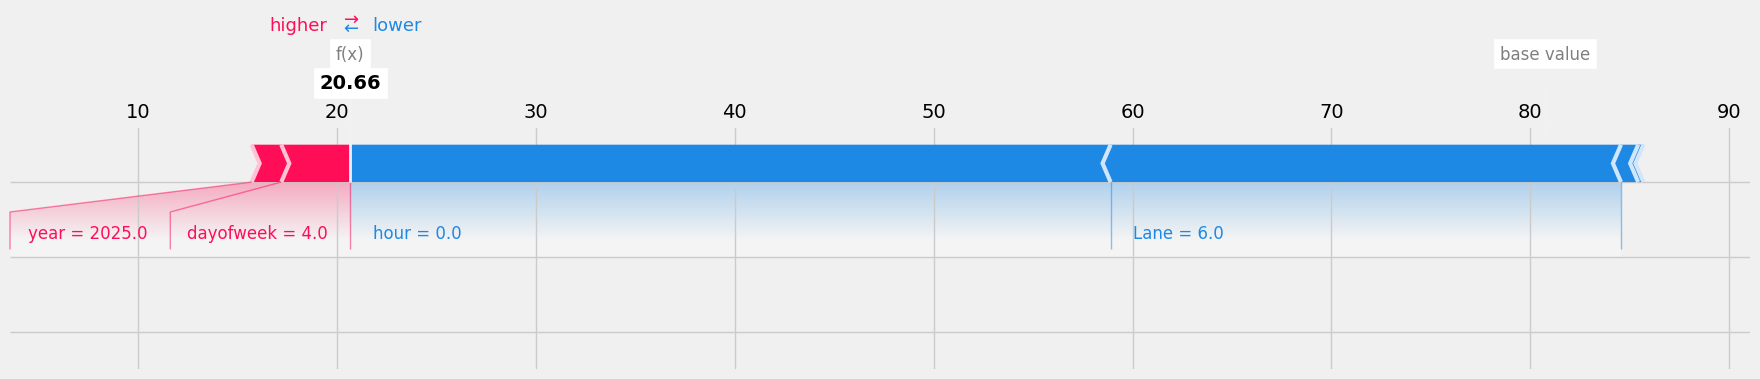

In [38]:
row = X_explain[(X_explain['Lane'] == 6) & (X_explain.index == '2025-07-04 00:00:00')]  # replace with your specific row selection

sv_row = explainer.shap_values(row)
shap.force_plot(base_value, sv_row, row, matplotlib=True)  # inline plot
plt.show()

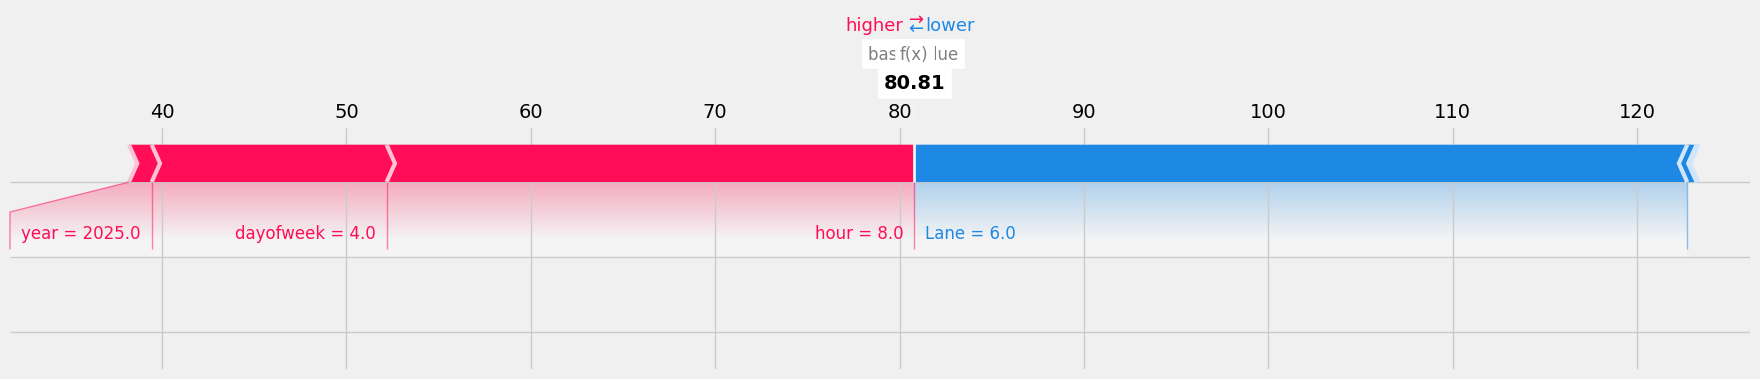

In [39]:
row = X_explain[(X_explain['Lane'] == 6) & (X_explain.index == '2025-07-04 08:00:00')]  # replace with your specific row selection

sv_row = explainer.shap_values(row)
shap.force_plot(base_value, sv_row, row, matplotlib=True)  # inline plot
plt.show()

In [320]:
print("Base value:", explainer.expected_value)

Base value: 137.98303


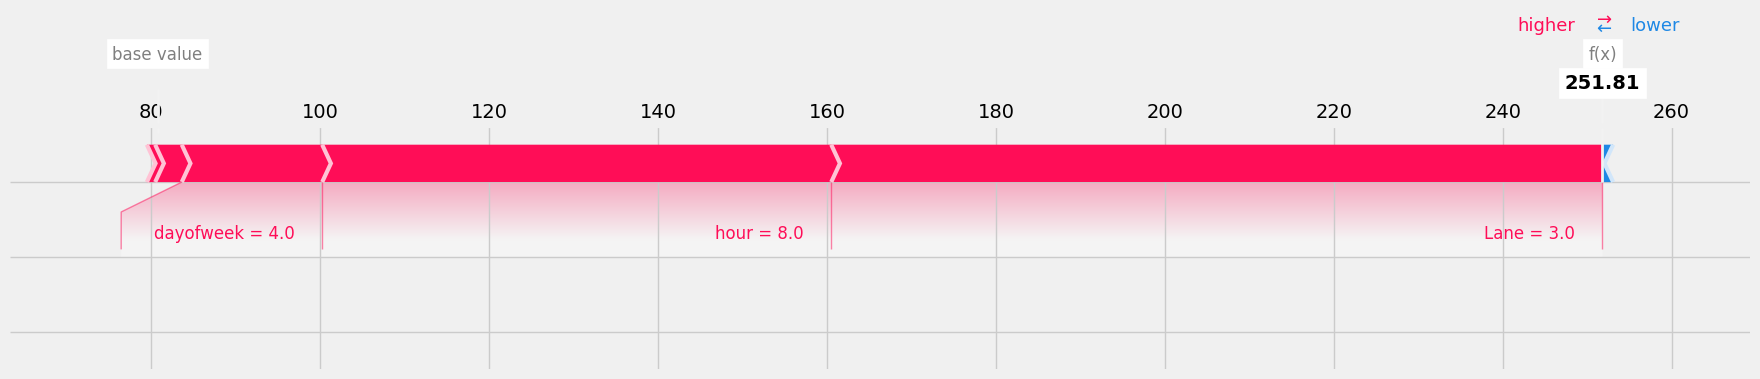

In [50]:
row = X_explain[(X_explain['Lane'] == 3) & (X_explain.index == '2025-07-04 08:00:00')]  # replace with your specific row selection

sv_row = explainer.shap_values(row)
shap.force_plot(base_value, sv_row, row, matplotlib=True)  # inline plot
plt.show()

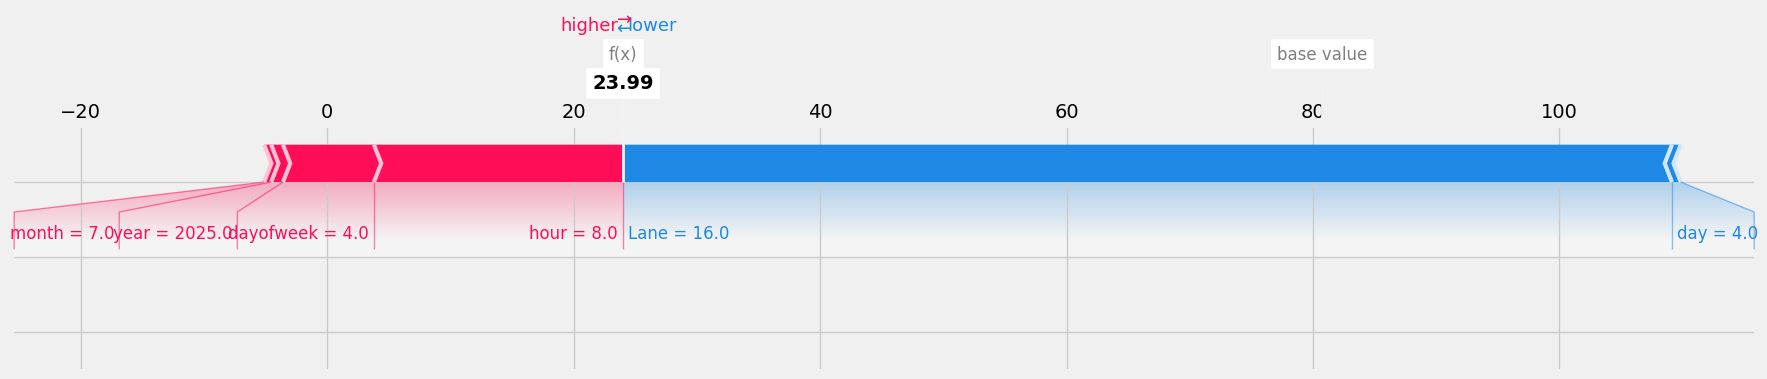

In [45]:
row = X_explain[(X_explain['Lane'] == 16) & (X_explain.index == '2025-07-04 08:00:00')]  # replace with your specific row selection

sv_row = explainer.shap_values(row)
shap.force_plot(base_value, sv_row, row, matplotlib=True)  # inline plot
plt.show()

In [59]:
test[(test['Lane'] == 3) & (test.index == '2025-07-04 08:00:00')]

,Detector_ID,Lane,Volume,hour,day,dayofweek,month,year,prediction
DateTime,,,,,,,,,
2025-07-04 08:00:00,2052,3,316,8,4,4,7,2025,251.813461


In [60]:
test[(test['Lane'] == 16) & (test.index == '2025-07-04 08:00:00')]

,Detector_ID,Lane,Volume,hour,day,dayofweek,month,year,prediction
DateTime,,,,,,,,,
2025-07-04 08:00:00,2052,16,15,8,4,4,7,2025,23.993311


In [321]:
test['prediction'].mean()

np.float32(132.75108)